In [1]:
%pip install pandas numpy matplotlib plotly seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
data=pd.read_csv('gender_submission.csv',encoding='utf-8')
data.head(100)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [47]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [49]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [50]:
train_data.shape

(891, 12)

In [51]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

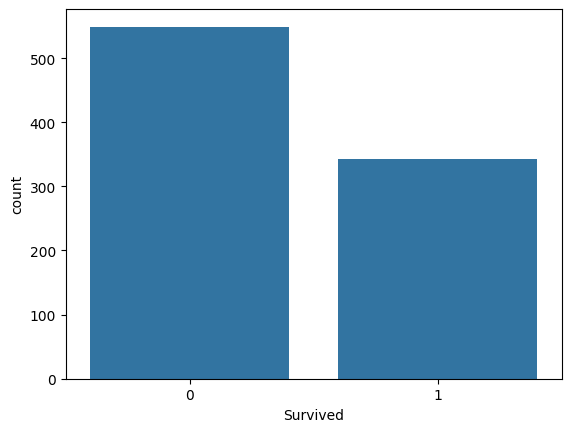

In [52]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

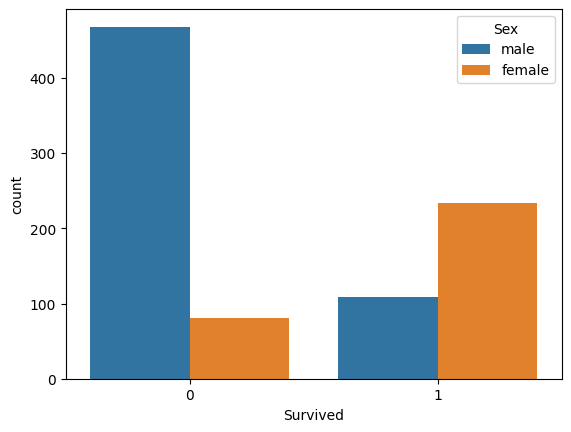

In [53]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

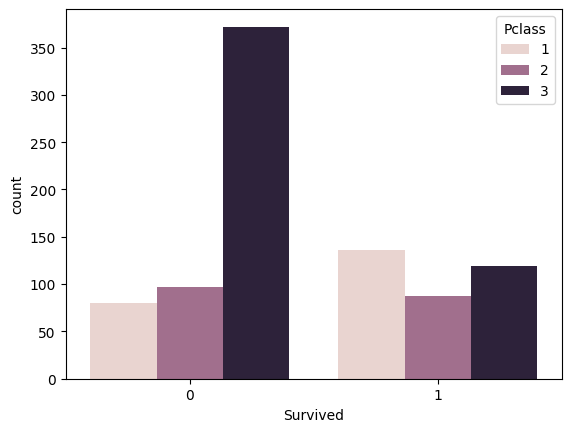

In [54]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

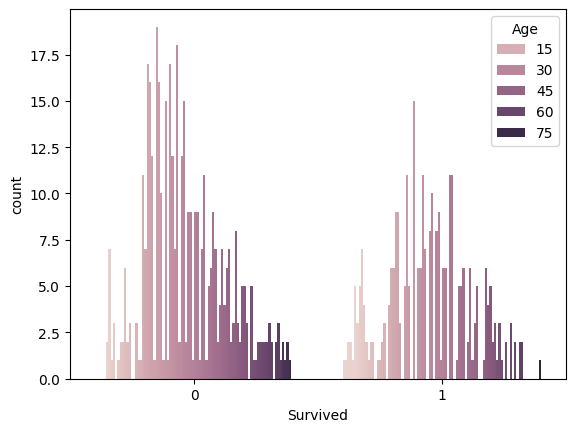

In [55]:
sns.countplot(x='Survived', hue='Age', data=train_data)

In [56]:
features=['Sex', 'Pclass', 'SibSp', 'Parch']
y=train_data['Survived']

In [58]:
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True


In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
model.fit(X, y)
prediction = model.predict(X_test) 
output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':prediction})
output.to_csv('file.csv', index=False)